In [1]:
import numpy as np
import random
import time
import math
import random
import os
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *

from to_get_data.generate_database import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD_clan import *
#from model_class.UD_aleatory_inheritance import *

# Pruebas oficiales solo clan. ULTIMAS ORIGINALES

In [1]:
#ENDOGAMY CONTROL POPULATION
#Parameters UD_endogamy
iniciais = 40 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
mediao = 4 # Average children per UD
#random.seed(42) # Random seed
t = 1200 #steps of the simulation
dataset = [] # For the dataset
#### Initialization endogamy
## clans
UD_endogamy.uds = {}
instancias_ud = []
original_media = mediao
media = original_media
for id_ud in range(1, int(iniciais) + 1):
        instancias_ud.append(UD_endogamy(id_ud, media))
## Varieties
limited_varieties = True
if limited_varieties == False:
    for id_ud, ud in UD_endogamy.uds.items():
        for _ in range(3):
            ud.varieties.append(Variety())
else:
    initial_varieties = [Variety() for _ in range (10)]
    for ud in UD_endogamy.uds.values():
        for _ in range(3):
            ud.varieties.append(random.choice(initial_varieties))
#### Simulation endogamy
vivas = [int(iniciais)]
for i in range (1, (t+1)):
    uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
    # Convertir el diccionario en una lista de pares (clave, valor)
    items = list(uds_copy.items())
    random.shuffle(items)
    uds_copy = dict(items)
    alive = len(uds_copy)
    if alive > 200 and (media == original_media): #or media == original_media-1):
        media -= media//2
        if media >= 4:
            media = media //2
        #print(f' no ano {i} temos a media {media}')
    elif alive < 150 and media < original_media:
        media = original_media
        #print(f' no ano {i} temos a media {media}')
    if not uds_copy:
        print("acabo")
        break
    # Cycle: 
    for id_ud, ud in uds_copy.items():
        ud.ter_filho()
        ud.buscar_ud(uds_copy, media, 50)
        ud.incrementar_idade()
        ud.death_probability(prob_morte)
    # Visualizations
    if i % 100 == 0: 
        #create_vis_geral(uds_copy, True)
        #dataset = general_charactersitics_data(i, uds_copy, dataset, False, False)
        G = marriage_graph_attribute(uds_copy, "clan", False)
        # community
        #results_community = count_links_between_and_within(G, 'clan')
        #p_graph_attribute(uds_copy, "clan", True)
        print(f"tamos en tiempo {i} con vivas {viv}")
        p_graph(uds_copy, True)

    # Collecting data for population
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    vivas.append(viv)        
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
#dataset = general_charactersitics_data(i, uds_copy, dataset, True, False)

NameError: name 'UD_endogamy' is not defined

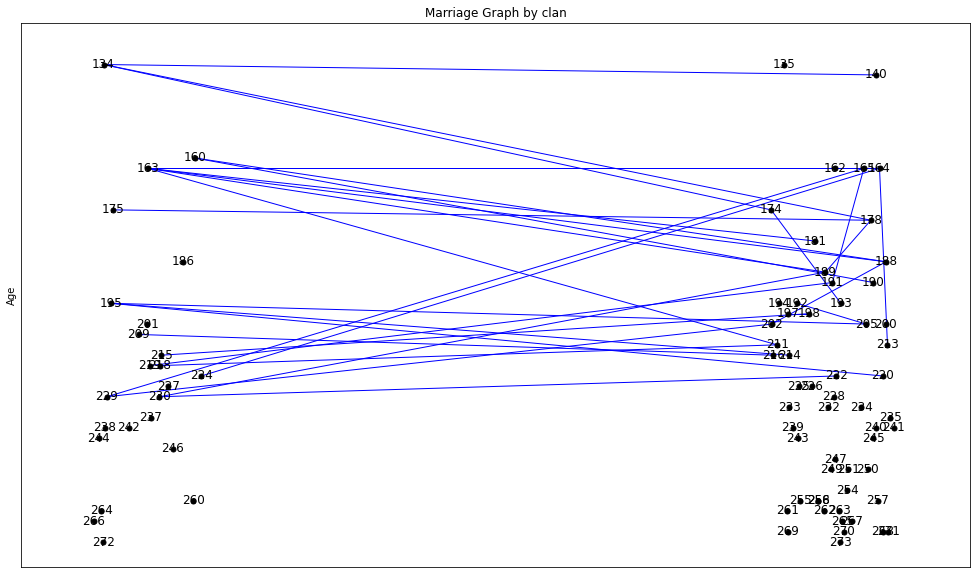

Total de enlaces: 30
Links inside the clan '2': 23.33%
Linkgs outside the clan '2' and '1': 30.00%
Linkgs outside the clan '1' and '2': 46.67%


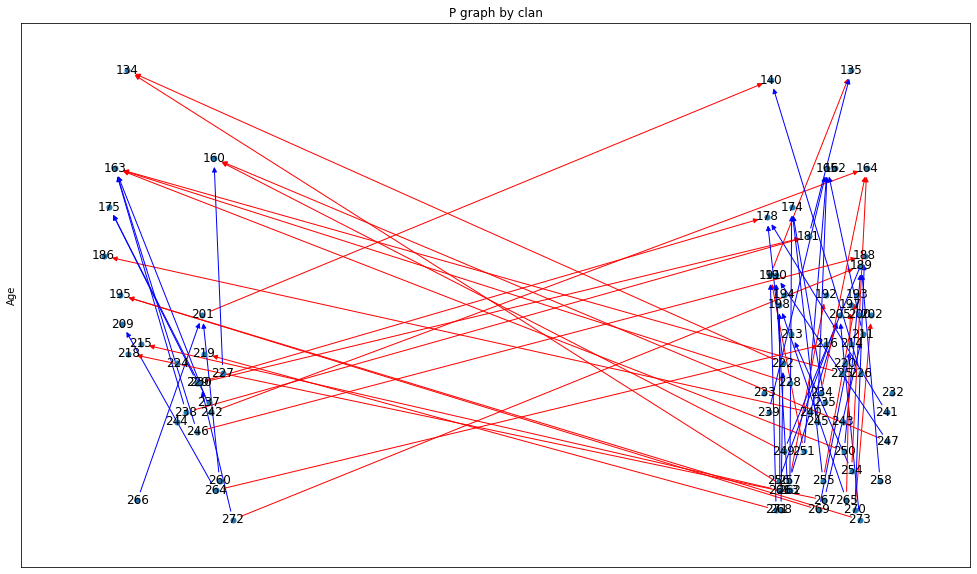

tamos en tiempo 100 con vivas 79


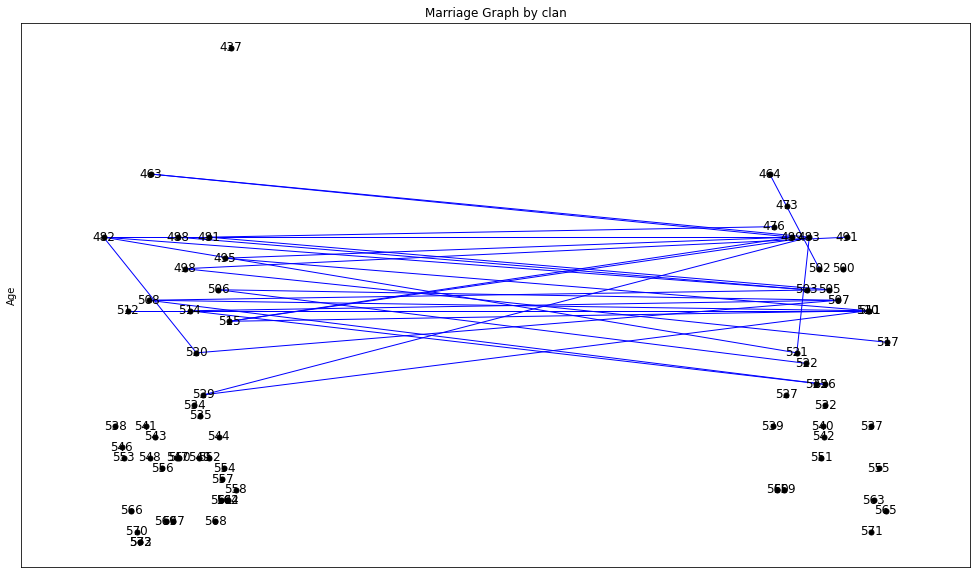

Total de enlaces: 30
Links inside the clan '1': 6.67%
Links inside the clan '2': 6.67%
Linkgs outside the clan '2' and '1': 43.33%
Linkgs outside the clan '1' and '2': 43.33%


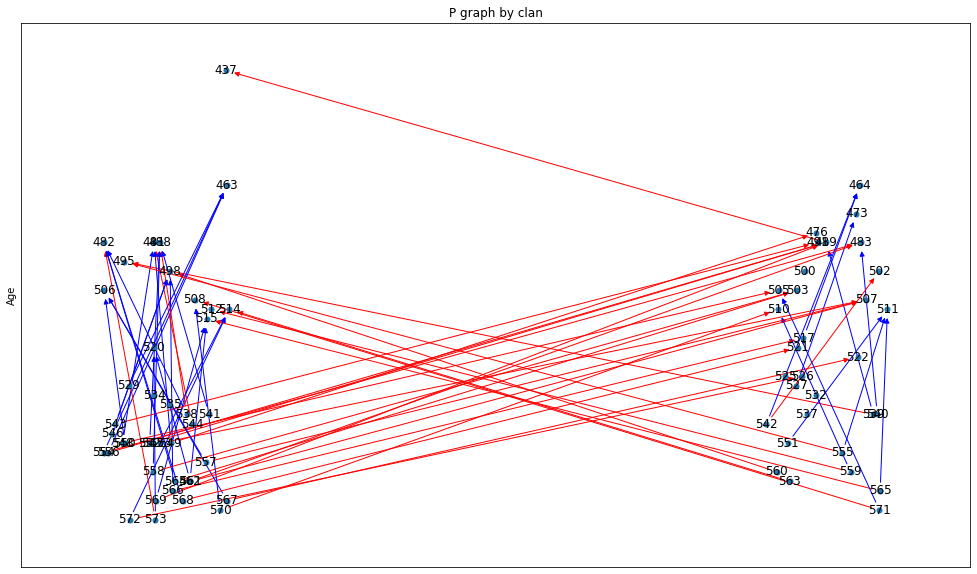

tamos en tiempo 200 con vivas 72


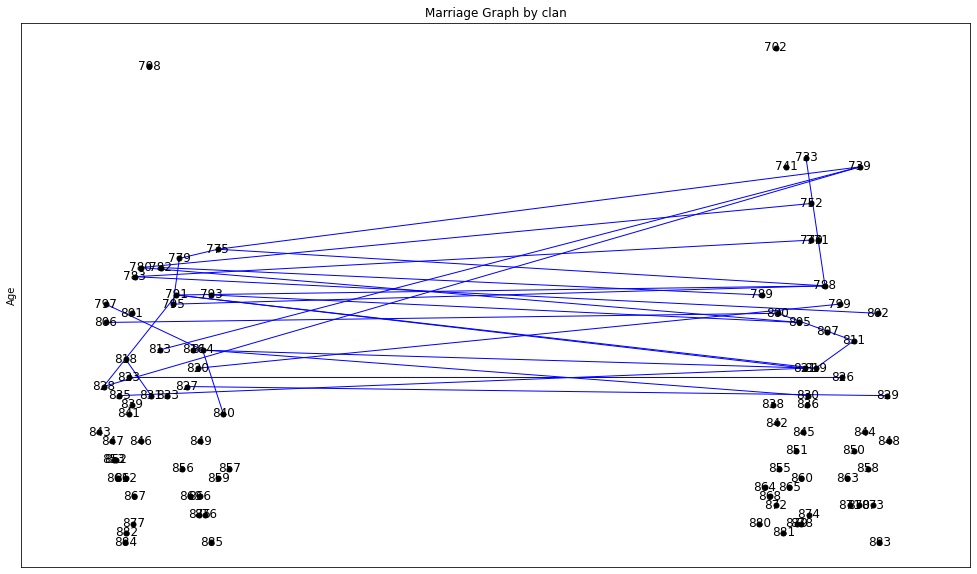

Total de enlaces: 30
Links inside the clan '1': 20.00%
Links inside the clan '2': 10.00%
Linkgs outside the clan '1' and '2': 46.67%
Linkgs outside the clan '2' and '1': 23.33%


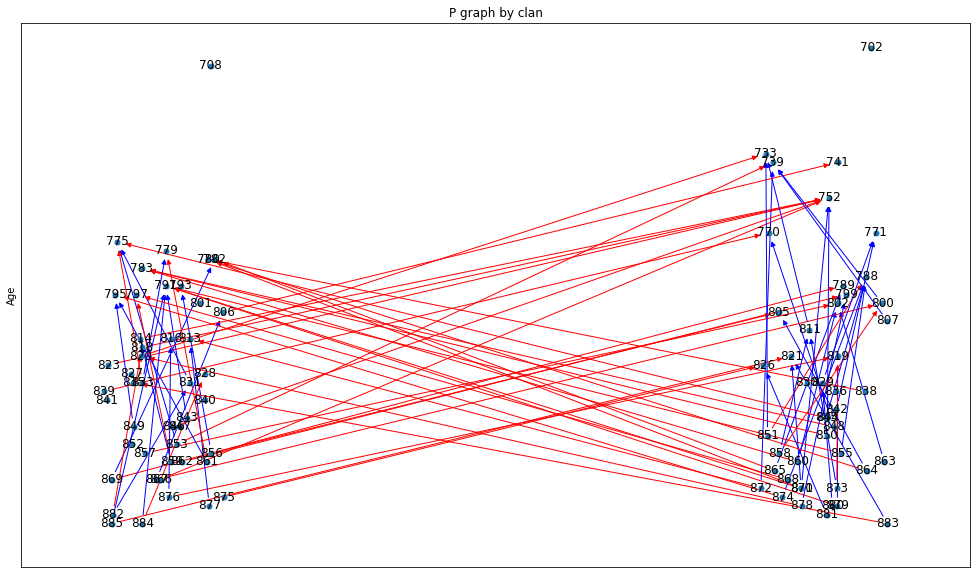

tamos en tiempo 300 con vivas 88


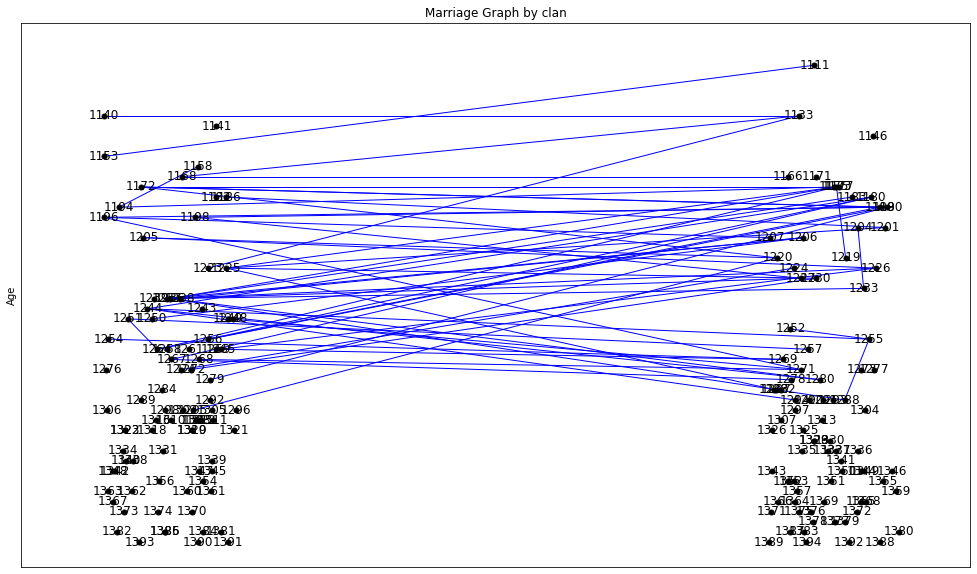

Total de enlaces: 59
Links inside the clan '2': 6.78%
Links inside the clan '1': 3.39%
Linkgs outside the clan '1' and '2': 38.98%
Linkgs outside the clan '2' and '1': 50.85%


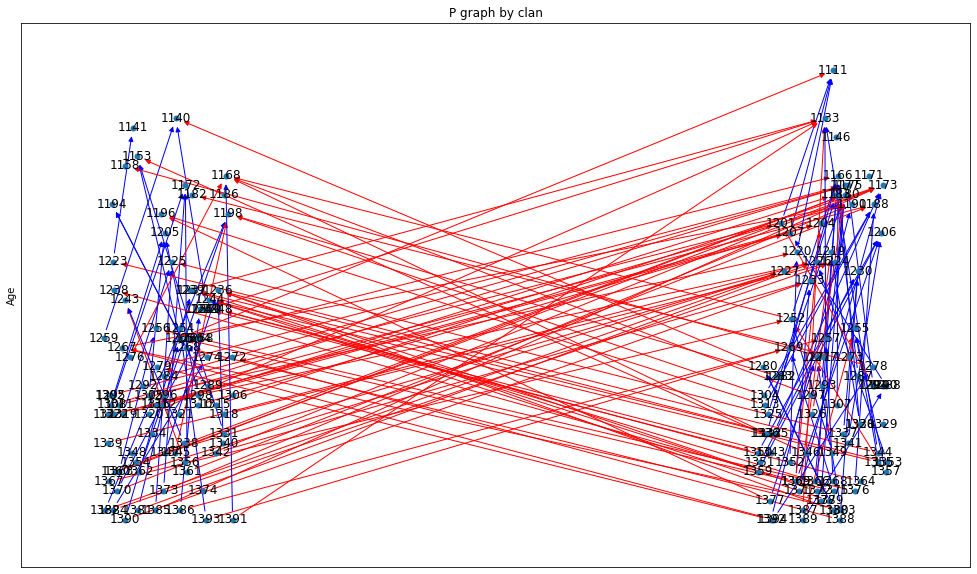

tamos en tiempo 400 con vivas 162


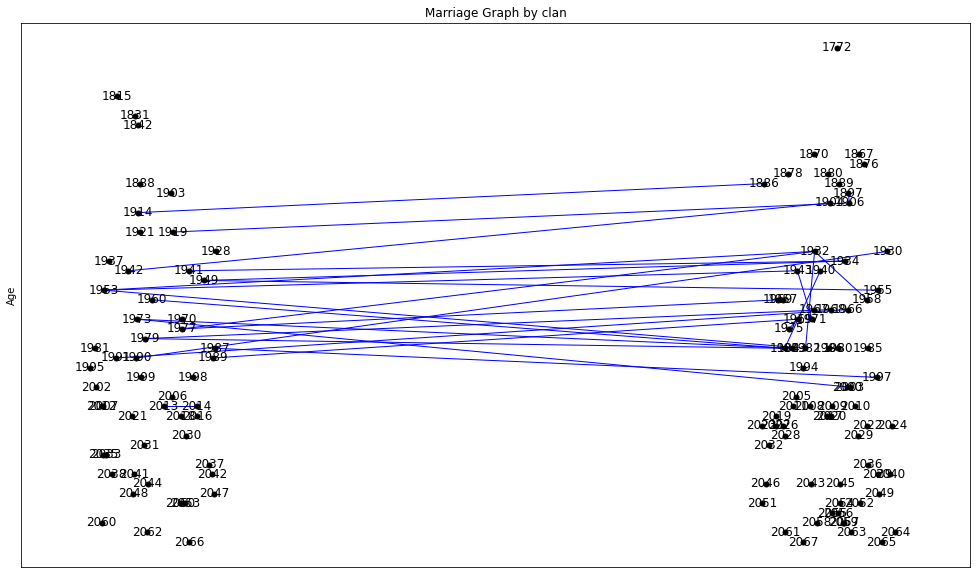

Total de enlaces: 27
Links inside the clan '2': 22.22%
Links inside the clan '1': 3.70%
Linkgs outside the clan '2' and '1': 44.44%
Linkgs outside the clan '1' and '2': 29.63%


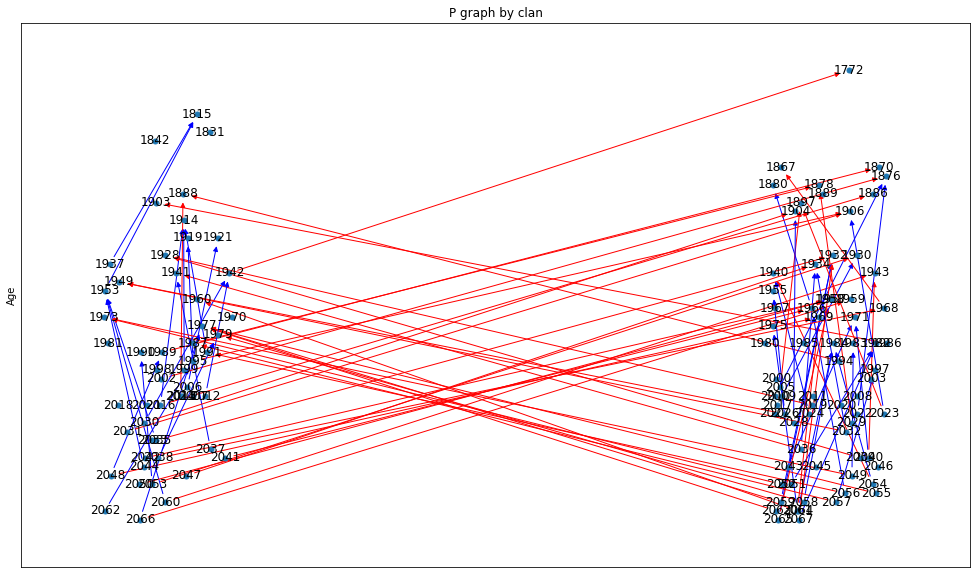

tamos en tiempo 500 con vivas 121


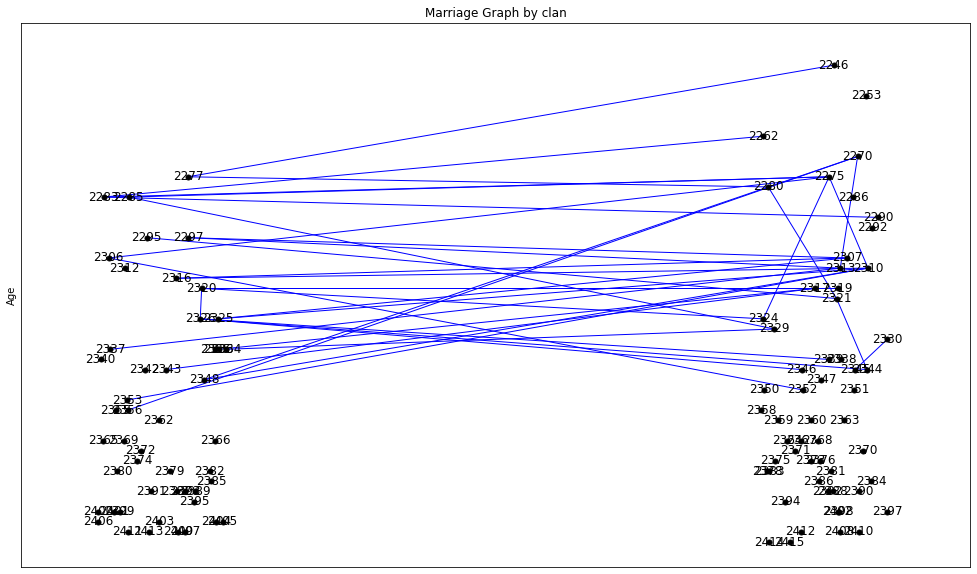

Total de enlaces: 36
Links inside the clan '2': 16.67%
Links inside the clan '1': 2.78%
Linkgs outside the clan '2' and '1': 33.33%
Linkgs outside the clan '1' and '2': 47.22%


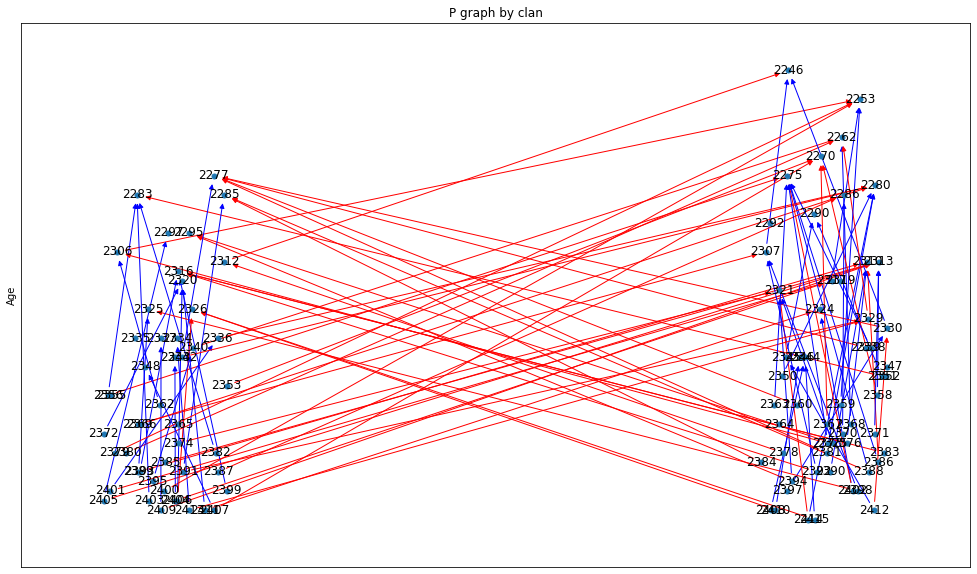

tamos en tiempo 600 con vivas 102


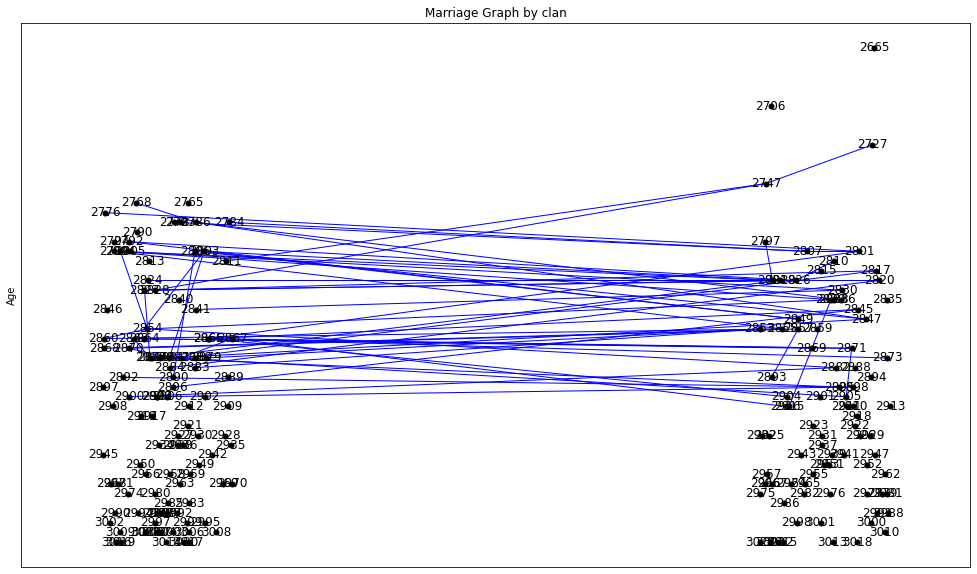

Total de enlaces: 65
Links inside the clan '2': 12.31%
Links inside the clan '1': 16.92%
Linkgs outside the clan '1' and '2': 30.77%
Linkgs outside the clan '2' and '1': 40.00%


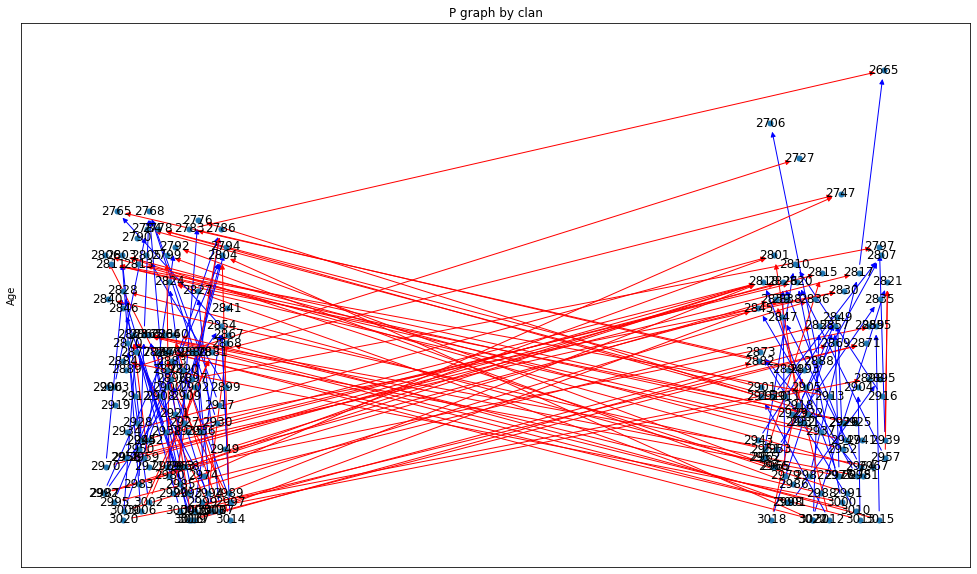

tamos en tiempo 700 con vivas 177


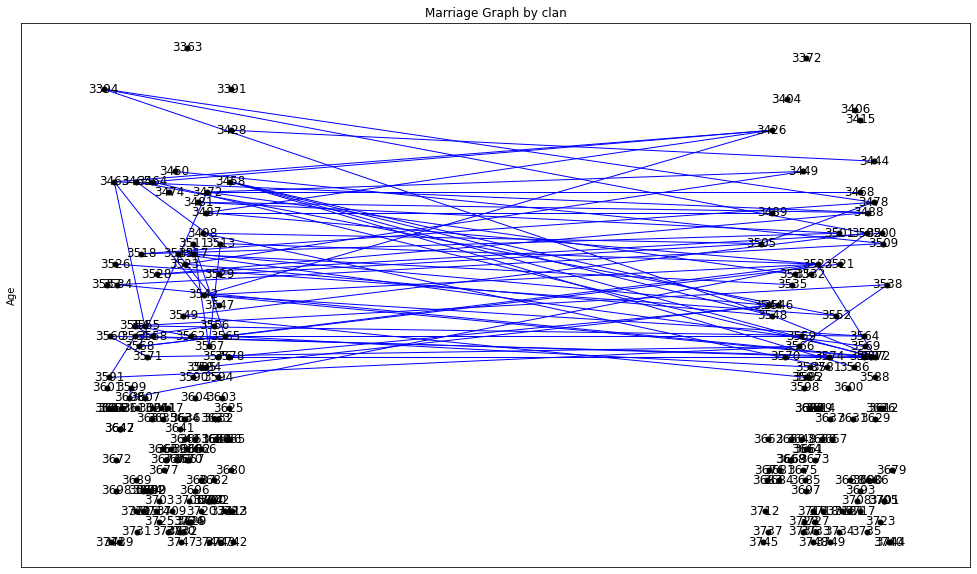

Total de enlaces: 78
Links inside the clan '1': 19.23%
Links inside the clan '2': 6.41%
Linkgs outside the clan '1' and '2': 35.90%
Linkgs outside the clan '2' and '1': 38.46%


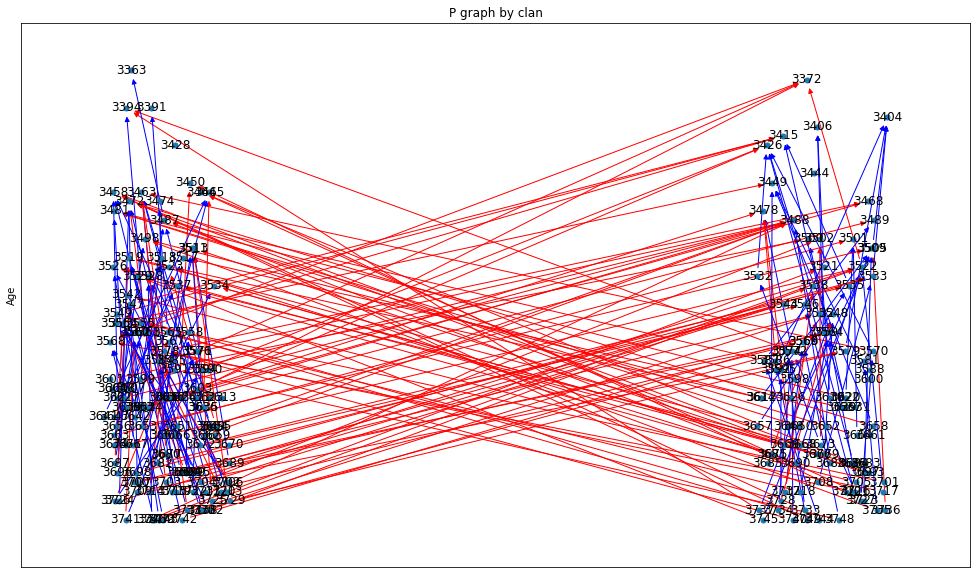

tamos en tiempo 800 con vivas 210


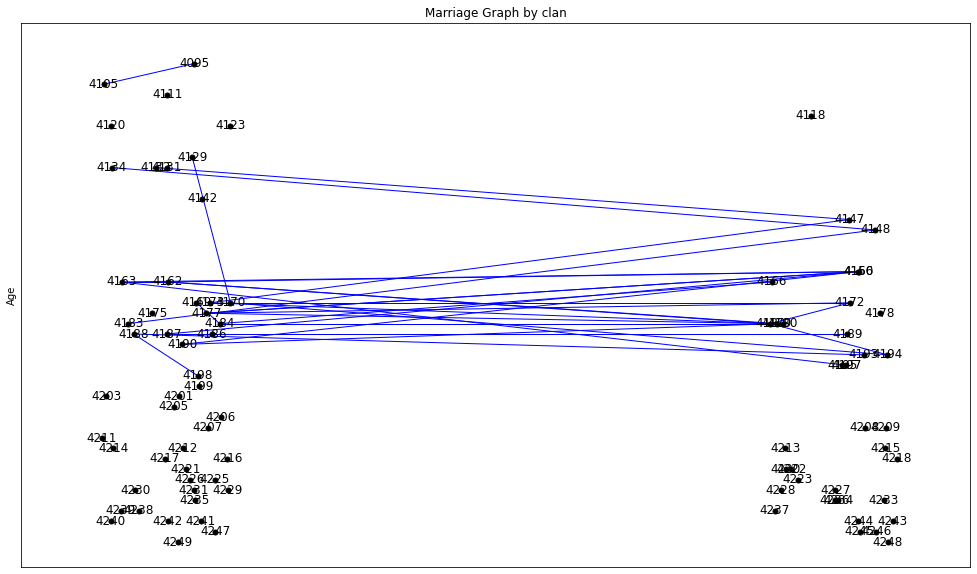

Total de enlaces: 30
Links inside the clan '1': 16.67%
Links inside the clan '2': 6.67%
Linkgs outside the clan '2' and '1': 50.00%
Linkgs outside the clan '1' and '2': 26.67%


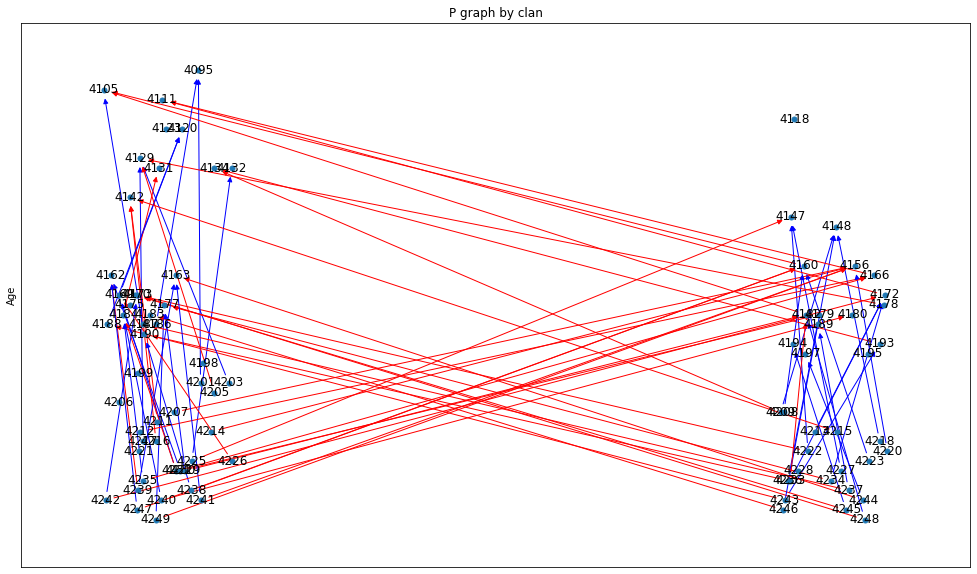

tamos en tiempo 900 con vivas 82


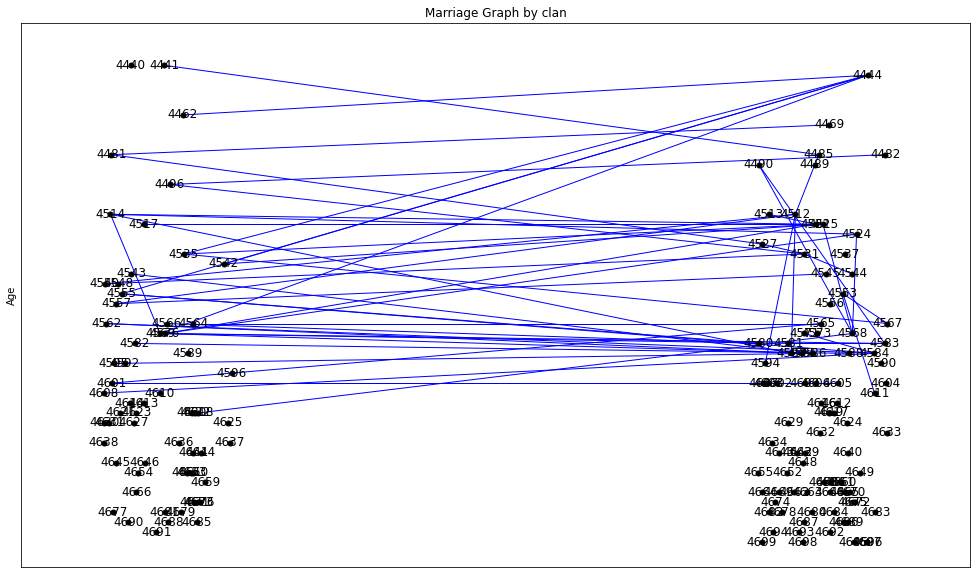

Total de enlaces: 55
Links inside the clan '2': 25.45%
Links inside the clan '1': 3.64%
Linkgs outside the clan '2' and '1': 38.18%
Linkgs outside the clan '1' and '2': 32.73%


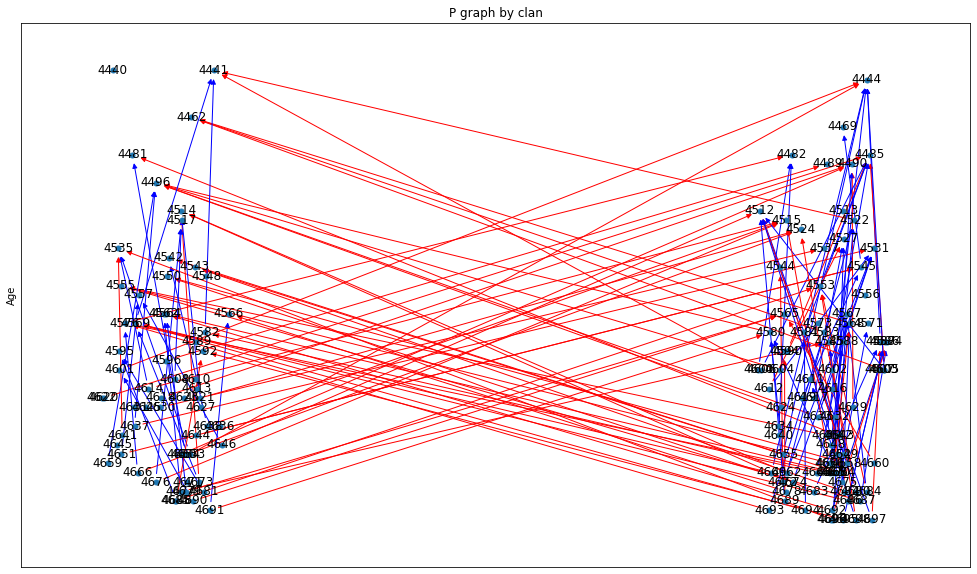

tamos en tiempo 1000 con vivas 144
144


In [2]:
#DUAL ORGANIZATION CONTROL POPULATION
#Parameters dual_organization
iniciais = 40 # Initial UD
clanes = [1,2]
clans = (clanes * (iniciais // 2)) + clanes[:(iniciais % 2)]
random.shuffle(clans)
prob_morte = 0.06 # Beta from the gutertz equation
mediao = 4 # Average children per UD
random.seed(42) # Random seed
t = 1000 #steps of the simulation
dataset = [] #For the data
original_media = mediao
media = original_media
#### Initialization dual_organization
## Clans
UD_dual_organization.uds = {}
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
        instancias_ud.append(UD_dual_organization(id_ud, media, clans.pop()))
## Varieties
limited_varieties = True
if limited_varieties == False:
    for id_ud, ud in UD_dual_organization.uds.items():
        for _ in range(3):
            ud.varieties.append(Variety())
else:
    initial_varieties = [Variety() for _ in range (10)]
    for ud in UD_dual_organization.uds.values():
        for _ in range(3):
            ud.varieties.append(random.choice(initial_varieties))
#### Simulation dual_organization
vivas = [int(iniciais)]
for i in range (1, (t+1)):
    uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
    # Convertir el diccionario en una lista de pares (clave, valor)
    items = list(uds_copy.items())
    random.shuffle(items)
    uds_copy = dict(items)
    alive = len(uds_copy)
    if alive > 200 and (media == original_media): #or media == original_media-1):
        media -= media//2
        if media >= 4:
            media = media //2
        #print(f' no ano {i} temos a media {media}')
    elif alive < 150 and media < original_media:
        media = original_media
        #print(f' no ano {i} temos a media {media}')
    if not uds_copy:
        print("acabo")
        break
    for id_ud, ud in uds_copy.items():
        ud.ter_filho()
        ud.buscar_ud(uds_copy, media, 50, True, 0.2)
        ud.incrementar_idade()
        ud.death_probability(prob_morte)
    if i % 100 == 0:
        #create_vis_geral(uds_copy, True)
        Gcl = marriage_graph_attribute(uds_copy, "clan", False)
        # clan
        results_clan = count_links_between_and_within(Gcl, "clan")
        G = p_graph_attribute(uds_copy, "clan", False)
        # Get the dyacronic data
        #dataset = general_charactersitics_data(i, uds_copy, dataset, False, True)
        print(f"tamos en tiempo {i} con vivas {viv}")

    # Collecting data for populational dynamics
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    vivas.append(viv)
        
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
#final = general_charactersitics_data(None, None, dataset, final = True, clan = True)

In [20]:
full = p_graph_attribute(UD_dual_organization.uds, "clan", False)
ciclos = detect_cycles(full, 'clan')
ciclos

{'cycle_1': 1078, 'cycle_2': 2780}

In [25]:
dictionary = {'1': 0, '2': 0}
por_c_2 = ciclos['cycle_2'] * 100 / (ciclos['cycle_1'] + ciclos['cycle_2'])
por_c_1 = 100 - por_c_2
por_c_1

27.941938828408496

In [4]:
print(len(UD_dual_organization.uds))
print(len(full))
# Check if the graph is directed
print(f"Is the graph directed? {full.is_directed()}")
# Check the connected components
connected_components = list(nx.strongly_connected_components(full))

4703
4703
Is the graph directed? True


In [8]:
detect_cycles(full, 'clan')

{'cycle_1': 1078, 'cycle_2': 2780}

In [13]:
full.nodes(data=True)

NodeDataView({1: {'ID': 1, 'age': 11, 'children': 0, 'father': None, 'mother': None, 'clan': 2}, 2: {'ID': 2, 'age': 44, 'children': 4, 'father': None, 'mother': None, 'clan': 2}, 3: {'ID': 3, 'age': 13, 'children': 0, 'father': None, 'mother': None, 'clan': 2}, 4: {'ID': 4, 'age': 35, 'children': 4, 'father': None, 'mother': None, 'clan': 2}, 5: {'ID': 5, 'age': 47, 'children': 2, 'father': None, 'mother': None, 'clan': 1}, 6: {'ID': 6, 'age': 27, 'children': 4, 'father': None, 'mother': None, 'clan': 1}, 7: {'ID': 7, 'age': 35, 'children': 2, 'father': None, 'mother': None, 'clan': 1}, 8: {'ID': 8, 'age': 29, 'children': 3, 'father': None, 'mother': None, 'clan': 2}, 9: {'ID': 9, 'age': 36, 'children': 3, 'father': None, 'mother': None, 'clan': 2}, 10: {'ID': 10, 'age': 45, 'children': 4, 'father': None, 'mother': None, 'clan': 1}, 11: {'ID': 11, 'age': 40, 'children': 7, 'father': None, 'mother': None, 'clan': 1}, 12: {'ID': 12, 'age': 21, 'children': 0, 'father': None, 'mother': No

In [ ]:
def detect_cycles_three_generations(G, attribute='clan'):
    """
    Detect cycles of length 2 and 3 in the graph, considering three clans.
    """
    cycle_counts = {"cycle_1": 0, "cycle_2": 0, "cycle_3": 0}

    for node_id, node_data in G.nodes(data=True):
        original_clan = node_data.get(attribute)
        mother_id = node_data.get('mother')

        if not mother_id or mother_id not in G.nodes:
            continue

        mother_clan = G.nodes[mother_id].get(attribute)

        # Cycle of 1 (incest, original node's clan matches its mother's clan)
        if mother_clan == original_clan:
            cycle_counts["cycle_1"] += 1
            continue

        # Cycle of 2: Check daughters
        children_ids = node_data.get('children', [])
        for child_id in children_ids:
            if child_id not in G.nodes:
                continue

            child_data = G.nodes[child_id]
            child_clan = child_data.get(attribute)
            child_mother_id = child_data.get('mother')

            # If the current node is the mother of this child
            if child_mother_id == node_id:
                if child_clan == mother_clan and child_clan != original_clan:
                    cycle_counts["cycle_2"] += 1

                # Cycle of 3: Check granddaughters
                grandchild_ids = child_data.get('children', [])
                for grandchild_id in grandchild_ids:
                    if grandchild_id not in G.nodes:
                        continue

                    grandchild_data = G.nodes[grandchild_id]
                    grandchild_clan = grandchild_data.get(attribute)
                    grandchild_mother_id = grandchild_data.get('mother')

                    # If the child is the mother of this grandchild
                    if grandchild_mother_id == child_id:
                        if grandchild_clan == mother_clan and grandchild_clan != child_clan and grandchild_clan != original_clan:
                            cycle_counts["cycle_3"] += 1

    return cycle_counts

In [6]:
def detect_cycles(G, attribute='clan'):
    """
    Detects cycles in a graph where clans interact through marriage and offspring relationships.
    
    Parameters:
    - G: A networkx DiGraph with nodes containing 'clan', 'mother', and 'children' attributes.
    - attribute: The attribute representing the clan (default: 'clan').
    
    Returns:
    - A dictionary with counts of cycles of length 1 and 2.
    """
    cycle_counts = {"cycle_1": 0, "cycle_2": 0}

    # Iterate over all nodes in the graph
    for node_id, node_data in G.nodes(data=True):
        original_clan = node_data.get(attribute)
        mother_id = node_data.get('mother')

        # If the node has no mother, skip this node
        if not mother_id:
            continue

        # Get the mother's clan
        mother_clan = G.nodes[mother_id].get(attribute) if mother_id in G.nodes else None

        # Check if the mother's clan is the same as the node's clan
        if mother_clan == original_clan:
            # Cycle of 1 (incest)
            cycle_counts["cycle_1"] += 1
            continue

        # Save the mother's clan for further checks
        saved_mother_clan = mother_clan

        # Check the children of the node
        children_ids = node_data.get('children', [])
        for child_id in children_ids:
            if child_id not in G.nodes:
                continue
            
            child_data = G.nodes[child_id]
            child_clan = child_data.get(attribute)
            child_mother_id = child_data.get('mother')

            # If the original node is the mother of this child
            if child_mother_id == node_id:
                # Check if the child's clan matches the saved mother's clan
                if child_clan == saved_mother_clan:
                    # Cycle of 2
                    cycle_counts["cycle_2"] += 1

    return cycle_counts

In [18]:
node_data = {
    'clan': 'B',
    'mother': 3,
    'children': [1,2,3]
}
node_data.get('children', [])

[1, 2, 3]

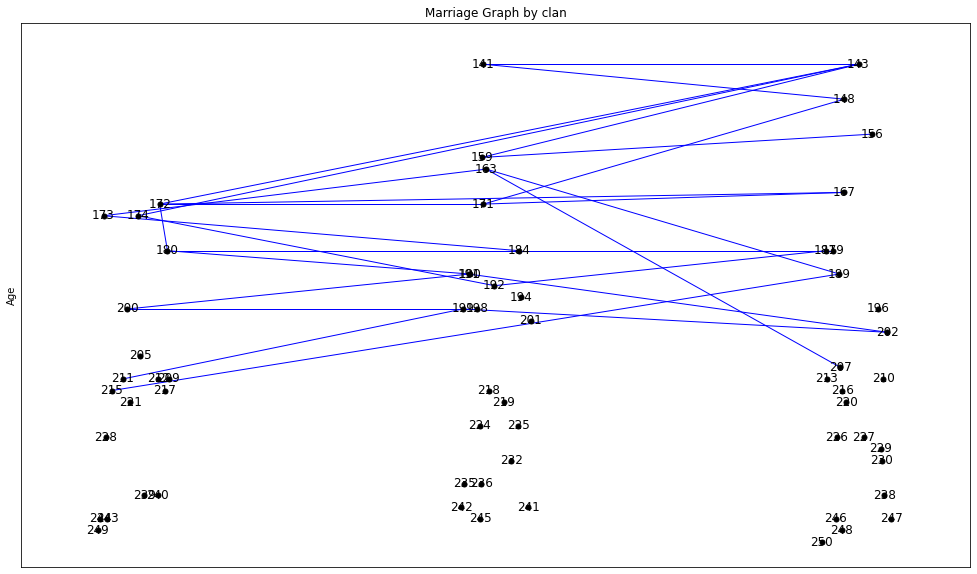

Total de enlaces: 25
Links inside the clan '1': 4.00%
Linkgs outside the clan '2' and '1': 12.00%
Linkgs outside the clan '2' and '3': 20.00%
Linkgs outside the clan '3' and '2': 24.00%
Linkgs outside the clan '3' and '1': 12.00%
Linkgs outside the clan '1' and '3': 8.00%
Linkgs outside the clan '1' and '2': 20.00%


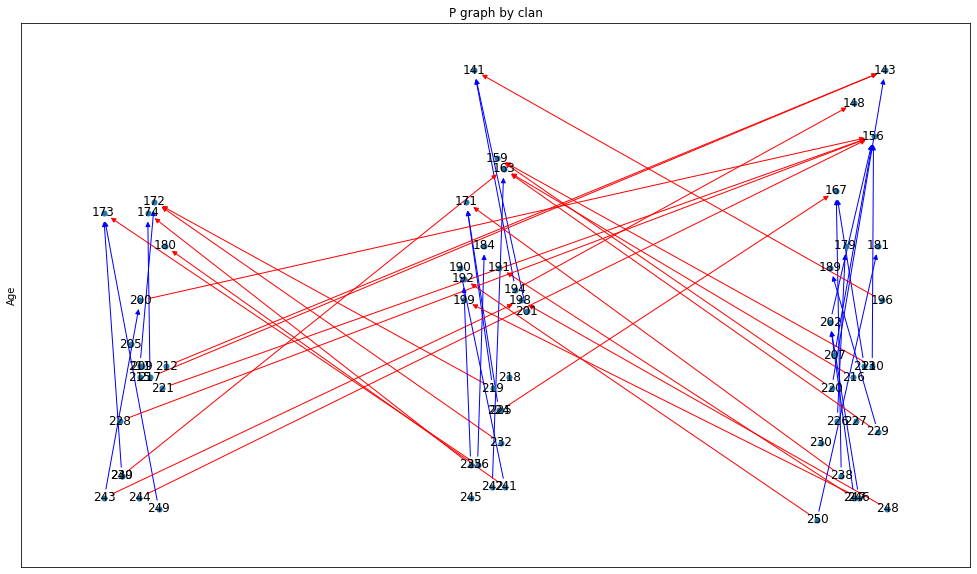

tamos en tiempo 100 con vivas 62


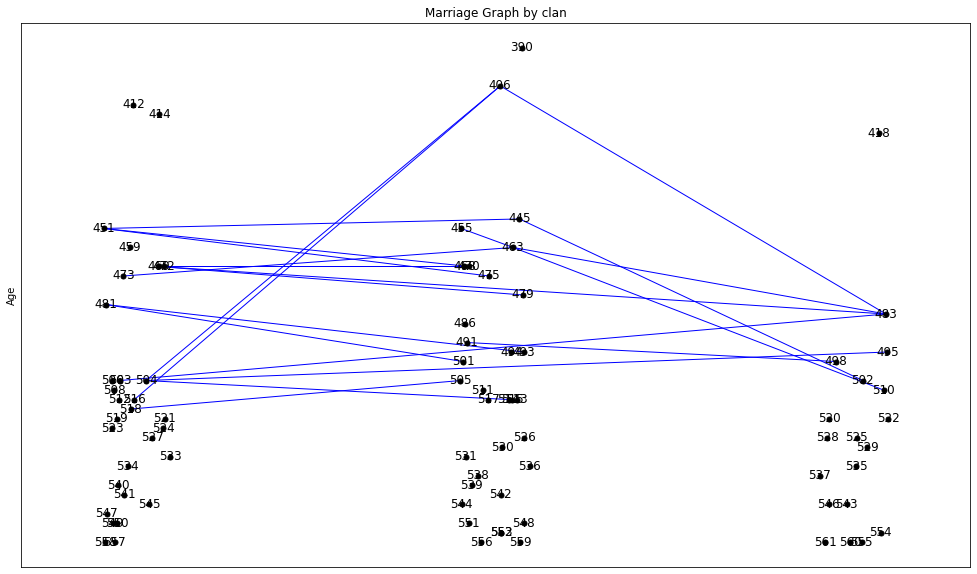

Total de enlaces: 21
Links inside the clan '2': 4.76%
Linkgs outside the clan '1' and '3': 4.76%
Linkgs outside the clan '3' and '1': 9.52%
Linkgs outside the clan '3' and '2': 19.05%
Linkgs outside the clan '2' and '3': 4.76%
Linkgs outside the clan '2' and '1': 52.38%
Linkgs outside the clan '1' and '2': 4.76%


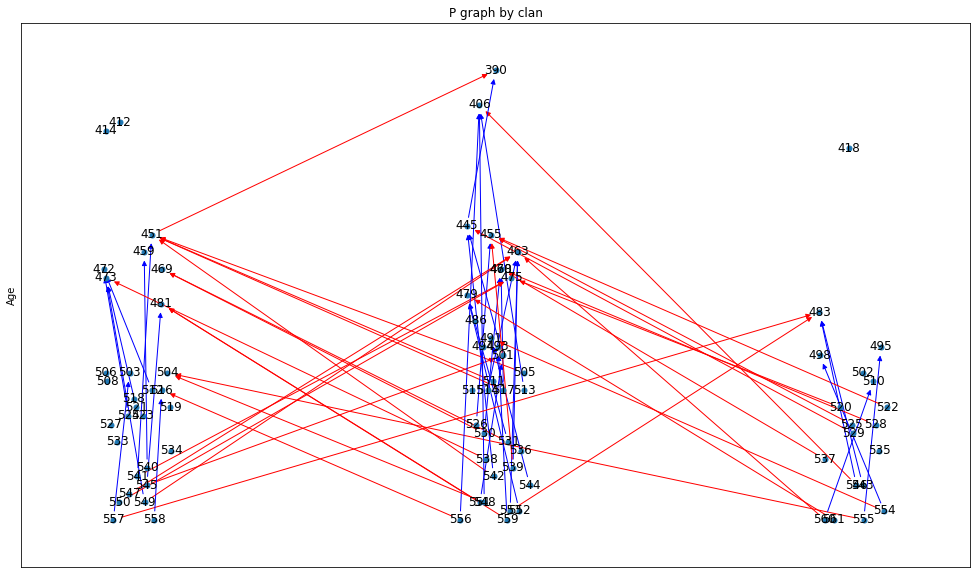

tamos en tiempo 200 con vivas 76


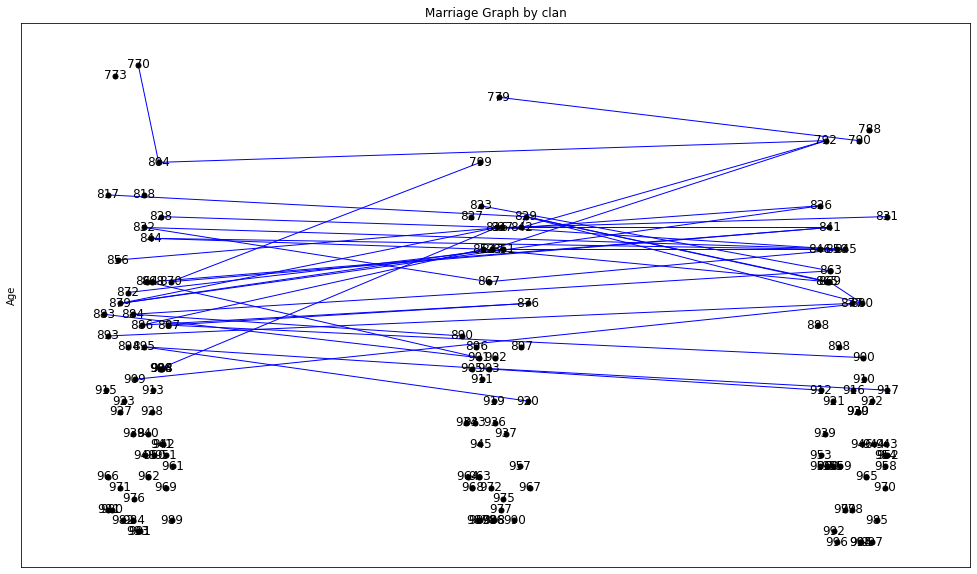

Total de enlaces: 46
Links inside the clan '2': 2.17%
Links inside the clan '3': 2.17%
Links inside the clan '1': 2.17%
Linkgs outside the clan '2' and '1': 28.26%
Linkgs outside the clan '3' and '2': 15.22%
Linkgs outside the clan '2' and '3': 17.39%
Linkgs outside the clan '3' and '1': 10.87%
Linkgs outside the clan '1' and '2': 8.70%
Linkgs outside the clan '1' and '3': 13.04%


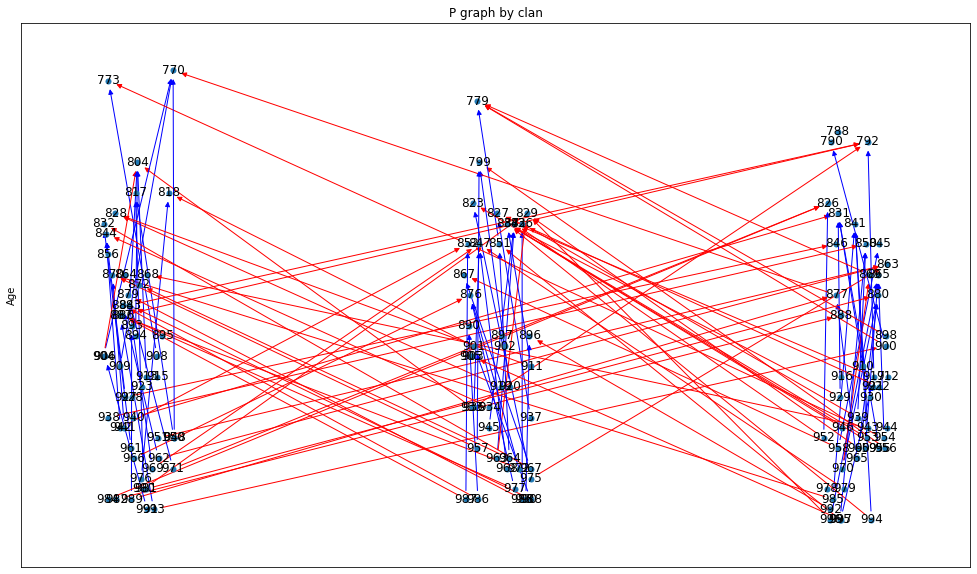

tamos en tiempo 300 con vivas 134


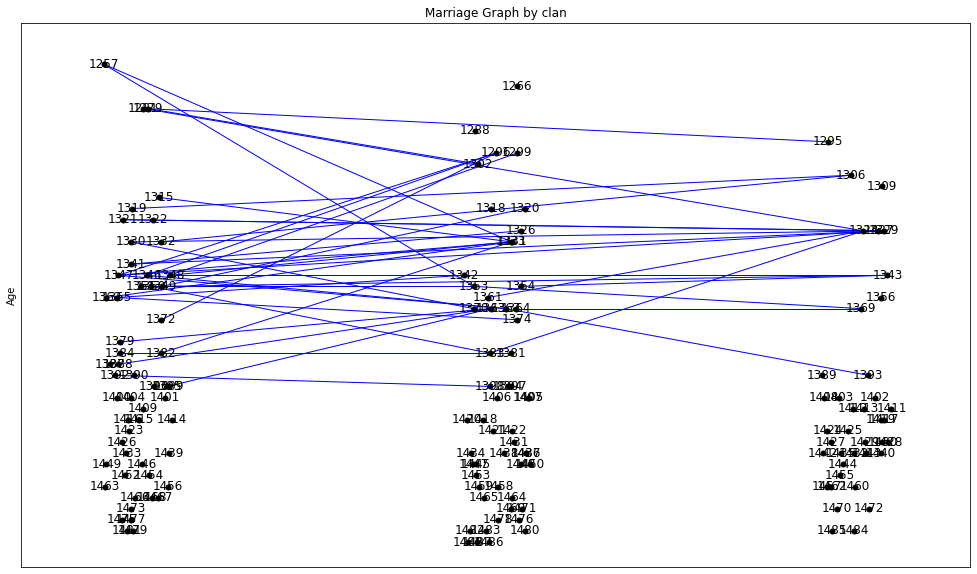

Total de enlaces: 44
Links inside the clan '1': 2.27%
Linkgs outside the clan '1' and '2': 36.36%
Linkgs outside the clan '1' and '3': 18.18%
Linkgs outside the clan '2' and '1': 22.73%
Linkgs outside the clan '2' and '3': 6.82%
Linkgs outside the clan '3' and '2': 6.82%
Linkgs outside the clan '3' and '1': 6.82%


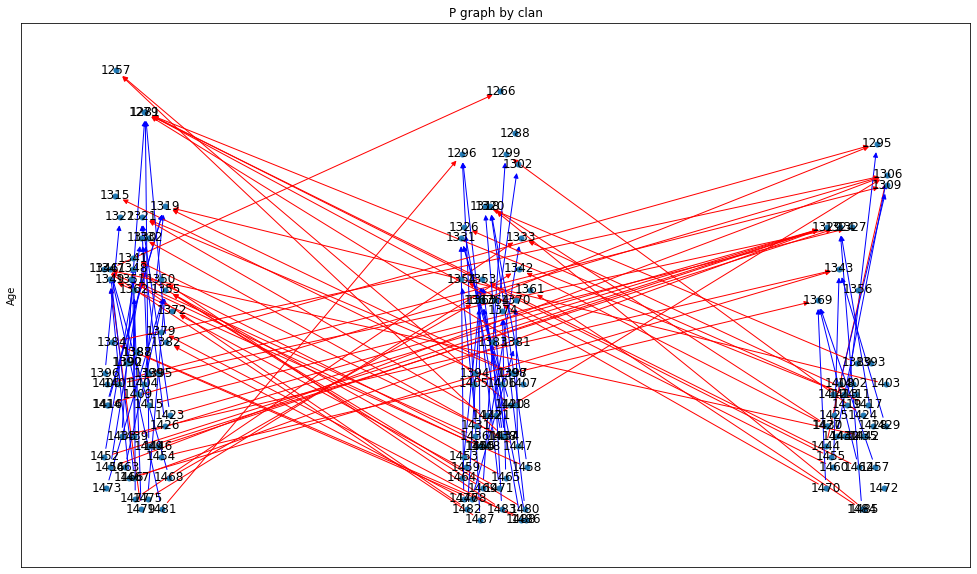

tamos en tiempo 400 con vivas 145
 no ano 483 temos a media 2


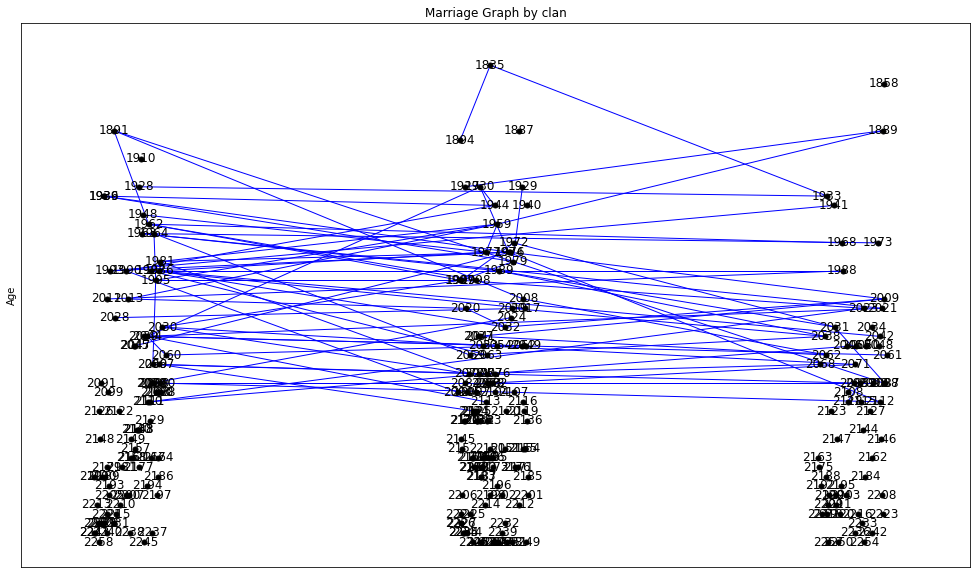

Total de enlaces: 90
Links inside the clan '2': 8.89%
Links inside the clan '3': 2.22%
Links inside the clan '1': 4.44%
Linkgs outside the clan '1' and '2': 27.78%
Linkgs outside the clan '3' and '2': 15.56%
Linkgs outside the clan '1' and '3': 8.89%
Linkgs outside the clan '2' and '3': 10.00%
Linkgs outside the clan '2' and '1': 16.67%
Linkgs outside the clan '3' and '1': 5.56%


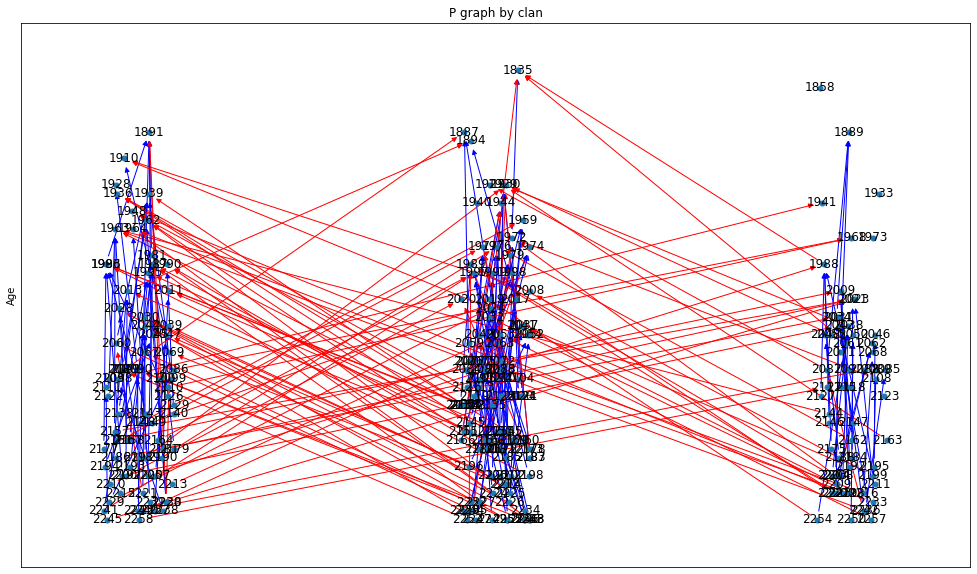

tamos en tiempo 500 con vivas 230
 no ano 539 temos a media 4


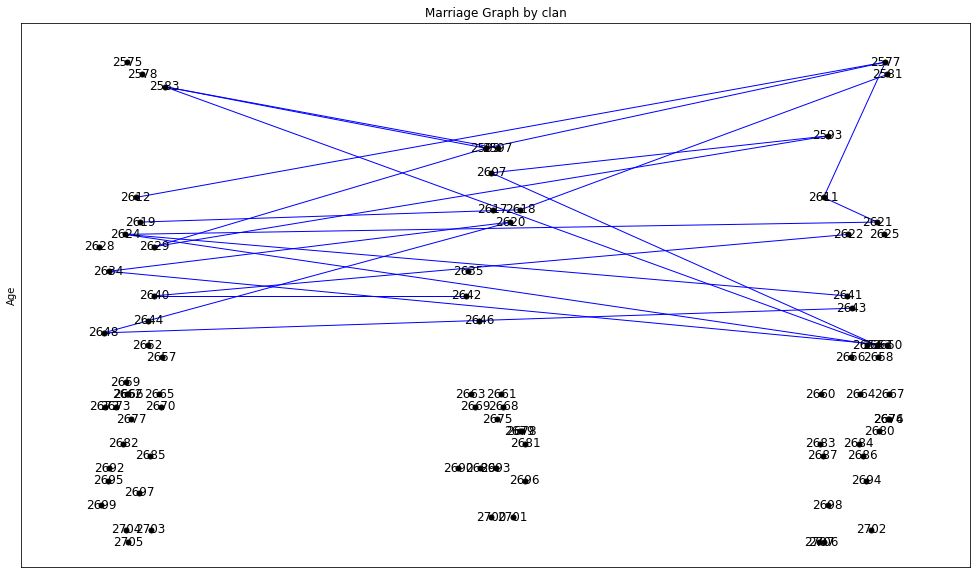

Total de enlaces: 22
Links inside the clan '3': 9.09%
Linkgs outside the clan '3' and '1': 27.27%
Linkgs outside the clan '1' and '2': 13.64%
Linkgs outside the clan '1' and '3': 13.64%
Linkgs outside the clan '2' and '3': 18.18%
Linkgs outside the clan '2' and '1': 18.18%


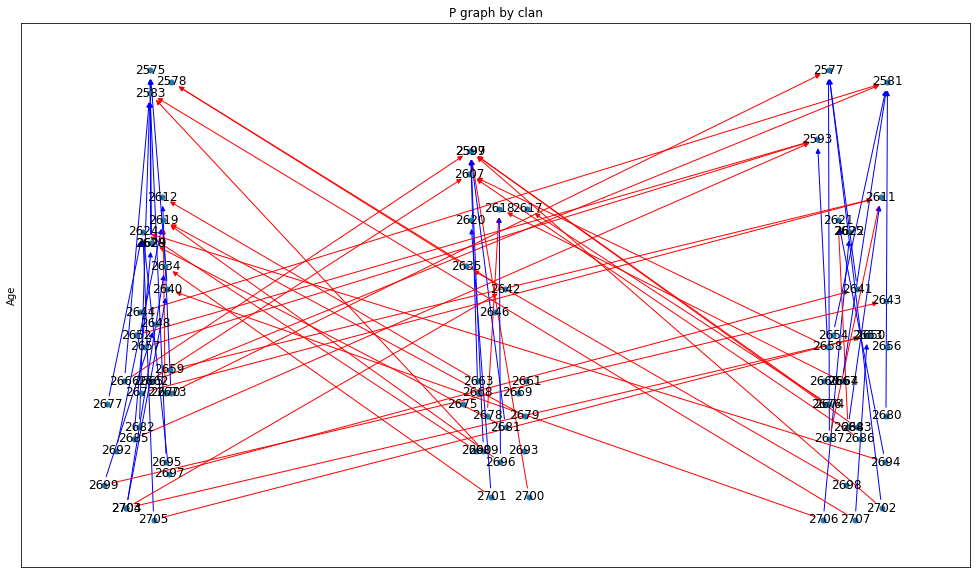

tamos en tiempo 600 con vivas 80


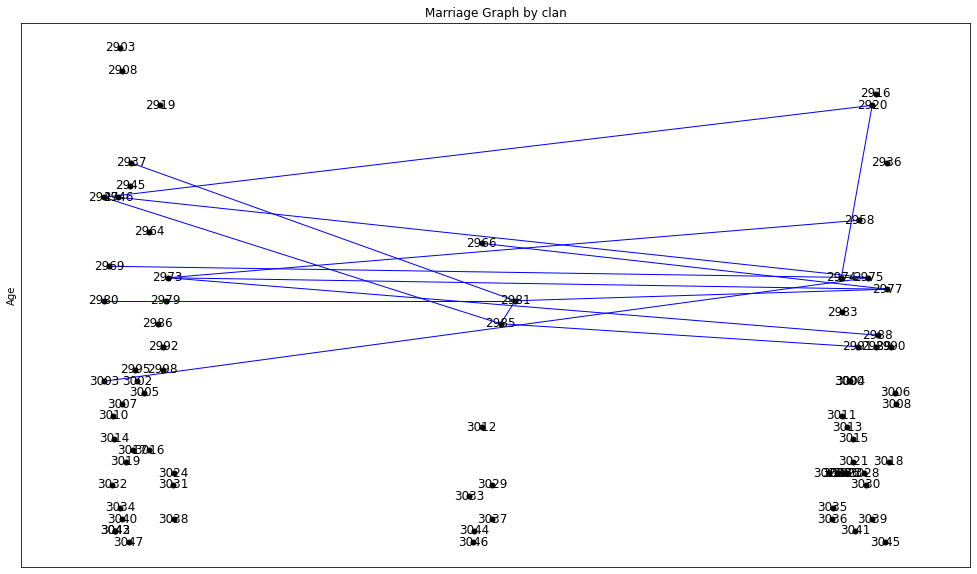

Total de enlaces: 15
Links inside the clan '3': 6.67%
Links inside the clan '2': 6.67%
Linkgs outside the clan '3' and '2': 6.67%
Linkgs outside the clan '3' and '1': 6.67%
Linkgs outside the clan '2' and '1': 20.00%
Linkgs outside the clan '2' and '3': 13.33%
Linkgs outside the clan '1' and '3': 40.00%


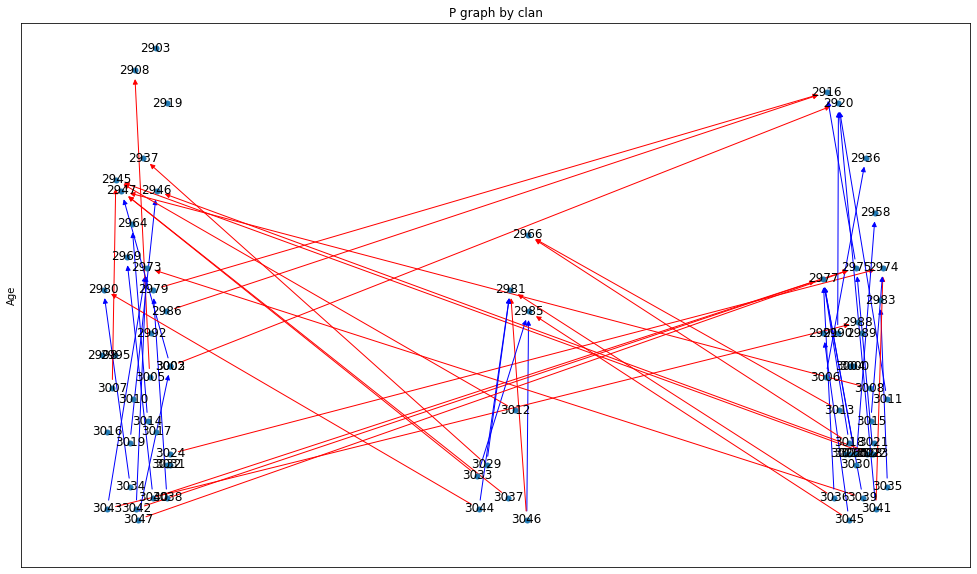

tamos en tiempo 700 con vivas 76


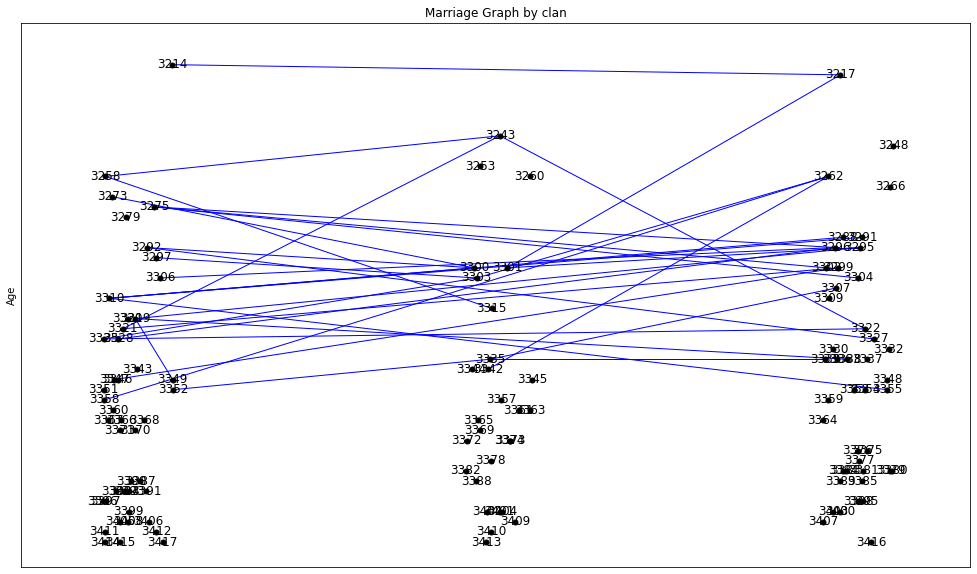

Total de enlaces: 34
Links inside the clan '1': 2.94%
Links inside the clan '3': 2.94%
Linkgs outside the clan '1' and '3': 23.53%
Linkgs outside the clan '3' and '1': 23.53%
Linkgs outside the clan '3' and '2': 8.82%
Linkgs outside the clan '2' and '3': 11.76%
Linkgs outside the clan '2' and '1': 20.59%
Linkgs outside the clan '1' and '2': 5.88%


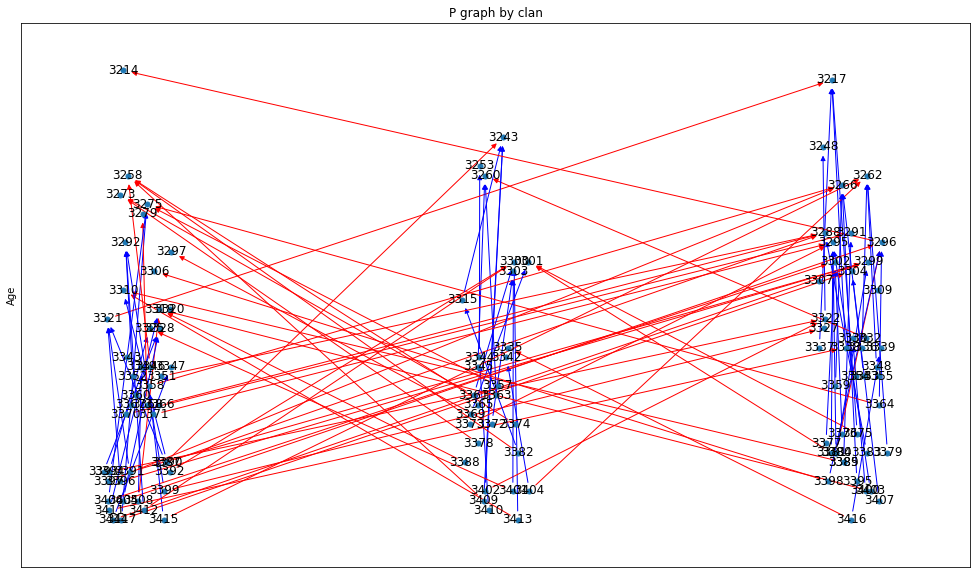

tamos en tiempo 800 con vivas 110


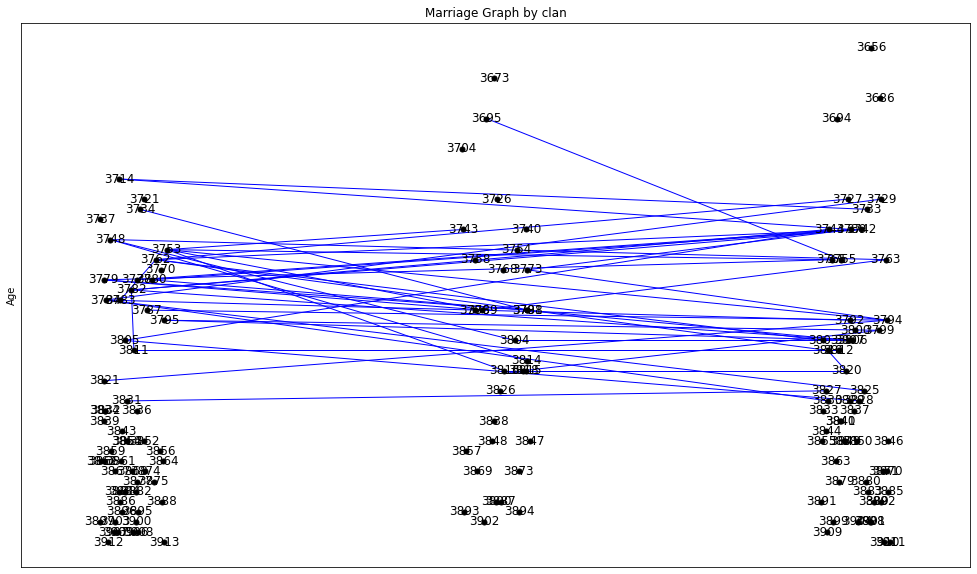

Total de enlaces: 47
Links inside the clan '3': 2.13%
Links inside the clan '1': 4.26%
Linkgs outside the clan '3' and '1': 21.28%
Linkgs outside the clan '1' and '2': 14.89%
Linkgs outside the clan '1' and '3': 36.17%
Linkgs outside the clan '2' and '1': 4.26%
Linkgs outside the clan '2' and '3': 10.64%
Linkgs outside the clan '3' and '2': 6.38%


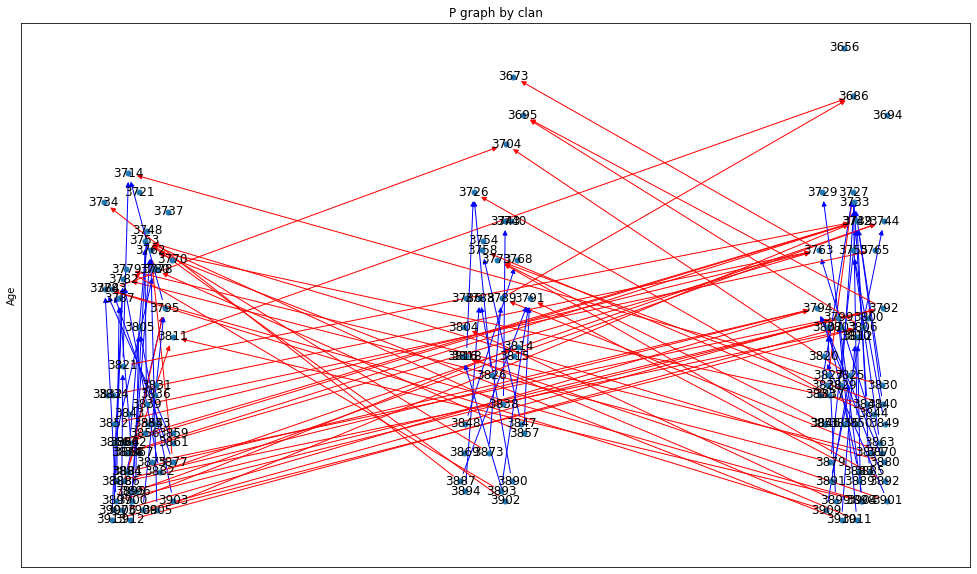

tamos en tiempo 900 con vivas 136


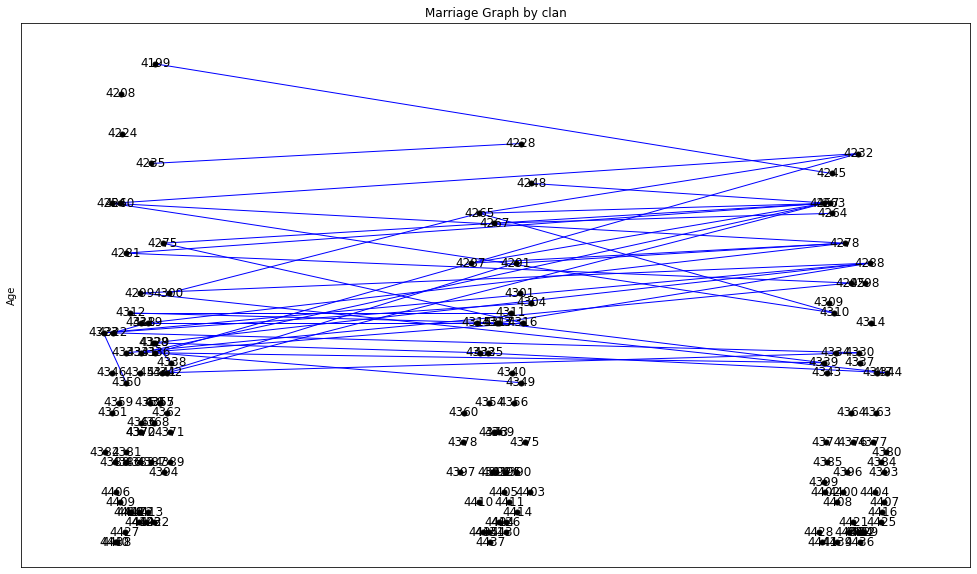

Total de enlaces: 44
Links inside the clan '1': 6.82%
Linkgs outside the clan '2' and '3': 15.91%
Linkgs outside the clan '2' and '1': 20.45%
Linkgs outside the clan '1' and '2': 4.55%
Linkgs outside the clan '3' and '2': 9.09%
Linkgs outside the clan '3' and '1': 22.73%
Linkgs outside the clan '1' and '3': 20.45%


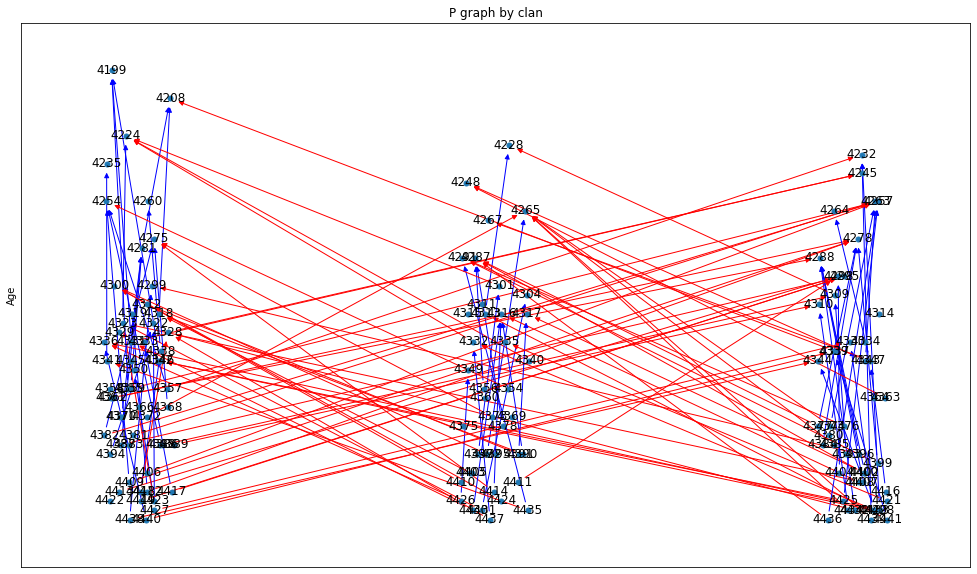

tamos en tiempo 1000 con vivas 137
137


In [9]:
#Generalized CONTROL POPULATION
#Parameters UD_generalized
iniciais = 40 # Initial UD
clanes = [1,2,3]
clans = (clanes * (iniciais // 3)) + clanes[:(iniciais % 3)]# Just 3 clans
random.shuffle(clans)
prob_morte = 0.06 # Beta from the gutertz equation
mediao = 4 # Average children per UD
random.seed(42) # Random seed
t = 1000 #steps of the simulation
dataset = [] #For the data
original_media = mediao
media = original_media
#### Initialization dual_organization
## Clans
UD_generalized.uds = {}
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
        instancias_ud.append(UD_generalized(id_ud, media, clans.pop()))
## Varieties
limited_varieties = True
if limited_varieties == False:
    for id_ud, ud in UD_generalized.uds.items():
        for _ in range(3):
            ud.varieties.append(Variety())
else:
    initial_varieties = [Variety() for _ in range (10)]
    for ud in UD_generalized.uds.values():
        for _ in range(3):
            ud.varieties.append(random.choice(initial_varieties))
#### Simulation dual_organization
vivas = [int(iniciais)]
for i in range (1, (t+1)):
    uds_copy = {id_ud: ud for id_ud, ud in UD_generalized.uds.items() if ud.activa}
    # Convertir el diccionario en una lista de pares (clave, valor)
    items = list(uds_copy.items())
    random.shuffle(items)
    uds_copy = dict(items)
    alive = len(uds_copy)
    if alive > 200 and (media == original_media): #or media == original_media-1):
        media -= media//2
        if media >= 4:
            media = media //2
        print(f' no ano {i} temos a media {media}')
    elif alive < 150 and media < original_media:
        media = original_media
        print(f' no ano {i} temos a media {media}')
    if not uds_copy:
        print("acabo")
        break
    for id_ud, ud in uds_copy.items():
        ud.ter_filho()
        ud.buscar_ud(uds_copy, media, 50, True, 0.2)
        ud.incrementar_idade()
        ud.death_probability(prob_morte)
    if i % 100 == 0:
        #create_vis_geral(uds_copy, True)
        Gcl = marriage_graph_attribute(uds_copy, "clan", False)
        # clan
        results_clan = count_links_between_and_within(Gcl, "clan")
        p_graph_attribute(uds_copy, "clan", False)
        # Get the dyacronic data
        #dataset = general_charactersitics_data(i, uds_copy, dataset, False, True)
        print(f"tamos en tiempo {i} con vivas {viv}")

    # Collecting data for populational dynamics
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    vivas.append(viv)
        
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
#final = general_charactersitics_data(None, None, dataset, final = True, clan = True)

In [92]:
len(UD_generalized.uds)

4740

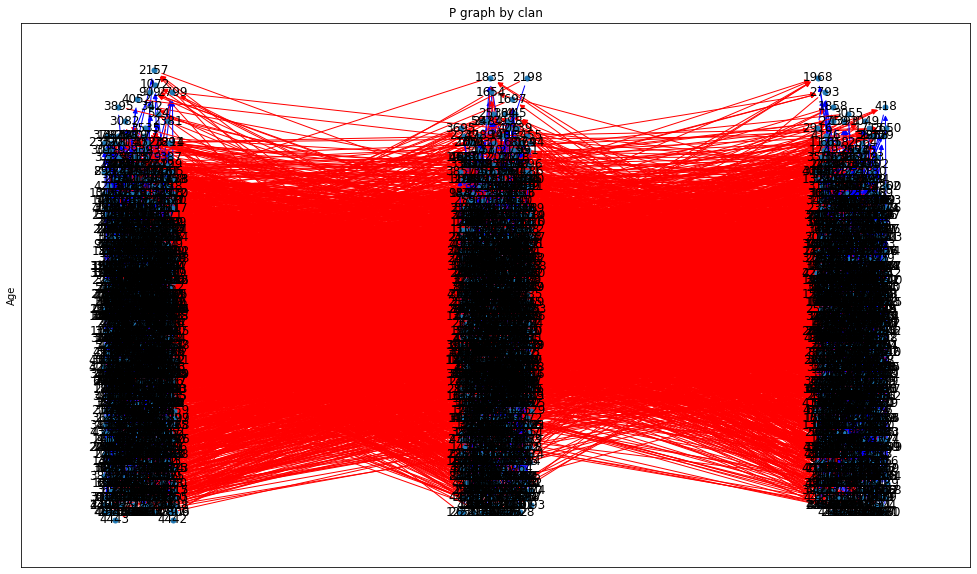

In [10]:
full_gen = p_graph_attribute(UD_generalized.uds, "clan", False)

In [15]:
detect_cycles_three_generations(full_gen, attribute='clan')

{'cycle_1': 392, 'cycle_2': 1027, 'cycle_3': 1998}

In [12]:
def detect_cycles_three_generations(G, attribute='clan'):
    """
    Detect cycles of length 2 and 3 in the graph, considering three clans.
    """
    cycle_counts = {"cycle_1": 0, "cycle_2": 0, "cycle_3": 0}

    for node_id, node_data in G.nodes(data=True):
        original_clan = node_data.get(attribute)
        mother_id = node_data.get('mother')

        if not mother_id or mother_id not in G.nodes:
            continue

        mother_clan = G.nodes[mother_id].get(attribute)

        # Cycle of 1 (incest, original node's clan matches its mother's clan)
        if mother_clan == original_clan:
            cycle_counts["cycle_1"] += 1
            continue

        # Cycle of 2: Check daughters
        children_ids = node_data.get('children', [])
        for child_id in children_ids:
            if child_id not in G.nodes:
                continue

            child_data = G.nodes[child_id]
            child_clan = child_data.get(attribute)
            child_mother_id = child_data.get('mother')

            # If the current node is the mother of this child
            if child_mother_id == node_id:
                if child_clan == mother_clan and child_clan != original_clan:
                    cycle_counts["cycle_2"] += 1

                # Cycle of 3: Check granddaughters
                grandchild_ids = child_data.get('children', [])
                for grandchild_id in grandchild_ids:
                    if grandchild_id not in G.nodes:
                        continue

                    grandchild_data = G.nodes[grandchild_id]
                    grandchild_clan = grandchild_data.get(attribute)
                    grandchild_mother_id = grandchild_data.get('mother')

                    # If the child is the mother of this grandchild
                    if grandchild_mother_id == child_id:
                        if grandchild_clan == mother_clan and grandchild_clan != child_clan and grandchild_clan != original_clan:
                            cycle_counts["cycle_3"] += 1

    return cycle_counts
